In [8]:
#Exercise 1
import pandas as pd
df = pd.read_csv('diabetes_prediction_dataset.csv')


In [11]:
print(df.head())

print("\nDataset Information:")
print(df.info())

print("\nDataset Statistics:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())


   gender   age  hypertension  heart_disease  ...    bmi  HbA1c_level  blood_glucose_level  diabetes
0  Female  80.0             0              1  ...  25.19          6.6                  140         0
1  Female  54.0             0              0  ...  27.32          6.6                   80         0
2    Male  28.0             0              0  ...  27.32          5.7                  158         0
3  Female  36.0             0              0  ...  23.45          5.0                  155         0
4    Male  76.0             1              1  ...  20.14          4.8                  155         0

[5 rows x 9 columns]

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-

In [15]:

positive_cases = df['diabetes'].sum()
negative_cases = len(df) - positive_cases
print(f"Number of Positive Cases: {positive_cases}")
print(f"Number of Negative Cases: {negative_cases}")

Number of Positive Cases: 8500
Number of Negative Cases: 91500


In [19]:
from sklearn.model_selection import train_test_split
X = df.drop('diabetes', axis=1)
y = df['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (70000, 8) (70000,)
Testing set shape: (30000, 8) (30000,)


Exercise 2

We will use Logistic Regression: Predicting yes/no outcomes, cause this is a binary classification problem (yes or no prediction as if someone has diabete or not)

In [22]:
from sklearn.preprocessing import StandardScaler

numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()

X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])


In [29]:
#Exercise 3

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = ['gender', 'smoking_history']

# Create transformers for numeric and categorical features
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

# Create a preprocessor to apply transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression())])

model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

Model Accuracy: 95.93%


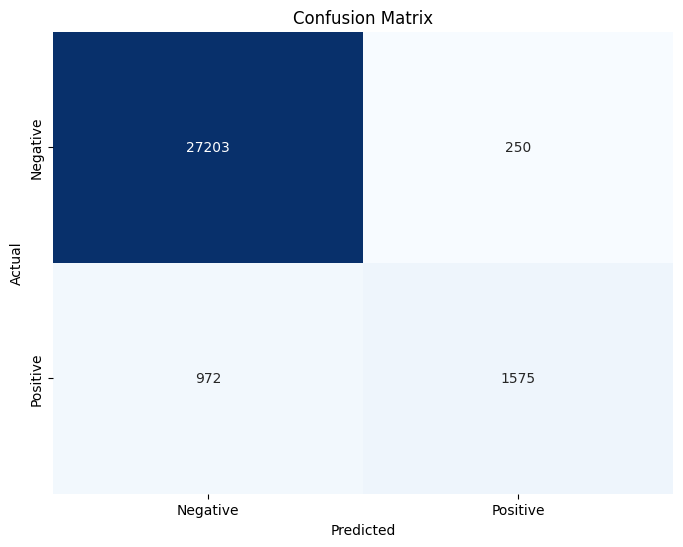

Classification Report:
               precision    recall  f1-score   support

    Negative       0.97      0.99      0.98     27453
    Positive       0.86      0.62      0.72      2547

    accuracy                           0.96     30000
   macro avg       0.91      0.80      0.85     30000
weighted avg       0.96      0.96      0.96     30000



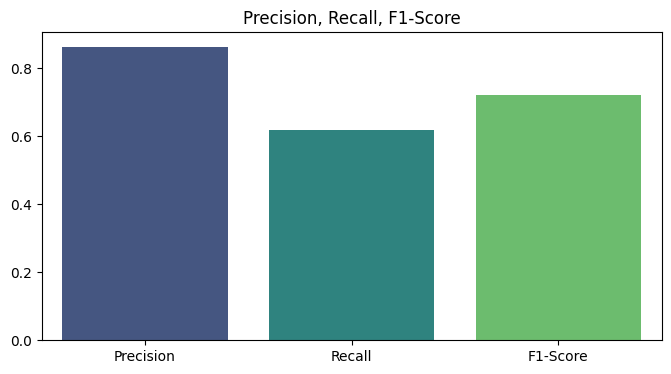

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_fscore_support

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy * 100:.2f}%')

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

class_report = classification_report(y_test, y_pred, target_names=['Negative', 'Positive'])
print("Classification Report:\n", class_report)

precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
plt.figure(figsize=(8, 4))
sns.barplot(x=['Precision', 'Recall', 'F1-Score'], y=[precision, recall, fscore], palette='viridis')
plt.title('Precision, Recall, F1-Score')
plt.show()


NameError: name 'X_train_scaled' is not defined